# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
# Overview of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [4]:
# List the types of action

df.action.value_counts()

action
view     6328
click    1860
Name: count, dtype: int64

In [5]:
# Viewers that also clicked

viewers = set(df[df.action == 'view']['id'].unique())

clickers = set(df[df.action == 'click']['id'].unique())

print(f'''Number of viewers: {len(viewers)} 
Number of clickers: {len(clickers)}''')

Number of viewers: 6328 
Number of clickers: 1860


In [6]:
only_view = viewers - clickers
only_click = clickers - viewers

print(f'''Number of viewers who didn't click: {len(only_view)} 
Number of clickers who didn't view: {len(only_click)} ''')

Number of viewers who didn't click: 4468 
Number of clickers who didn't view: 0 


In [7]:
# Overlap between control and experiment groups

control_grp = set(df[df.group == 'control']['id'].unique())

experiment_grp = set(df[df.group == 'experiment']['id'].unique())

control_and_experiment = control_grp & experiment_grp

print(f'''Number of control group participants: {len(control_grp)} 
Number of experiment group participants: {len(experiment_grp)}
Number of participants in control AND experimental groups: {len(control_and_experiment)}''')

Number of control group participants: 3332 
Number of experiment group participants: 2996
Number of participants in control AND experimental groups: 0


The data includes 4 columns: timestamp, id, group and action. Action includes either view or click. User ids are repeated, as those who viewed are also listed as click. Group includes either control or experiment. There are no users that overlap in both groups.

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [8]:
#import library
from scipy import stats

**Statistical Test**: I will be conducting a chi-squared test because I will be comparing 2 categorical features to determine if they are independent. I am comparing group types (control and experiment) to action type (click or view only).

$H_0$: The experiment group has less or the same amount of clicks on the homepage than the control group. <br>
$H_1$: The experiment group has more clicks on the homepage than the control group.

$\alpha$ = 0.05


In [13]:
# Create contingency table for group and action

contingency_table = pd.crosstab(df['group'], df['action'])
contingency_table

action,click,view
group,,
control,932,3332
experiment,928,2996


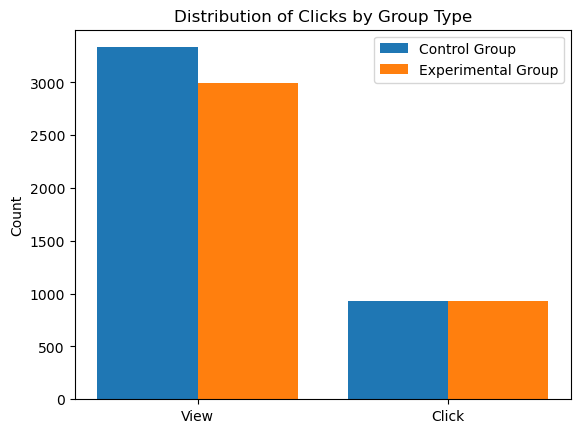

In [14]:
# Visualize data

control = df.loc[df["group"] == 'control', "action"]
experimental = df.loc[df["group"] == 'experiment', "action"]

fig, ax = plt.subplots()

ax.hist(
    x=[control, experimental],
    label=["Control Group", "Experimental Group"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["View", "Click"])
ax.set_title("Distribution of Clicks by Group Type")

ax.legend();

In [15]:
stats.chisquare(control, experimental)

ValueError: could not convert string to float: 'view'

In [16]:
# Perform statistical test
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=3.636160051233291, pvalue=0.056537191086915774, dof=1, expected_freq=array([[ 968.61748901, 3295.38251099],
       [ 891.38251099, 3032.61748901]]))

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [ ]:
#Your code here



### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [ ]:
#Your code here

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [17]:
#Your code here
stats.norm.sf(INSERT_VARIABLE) # TODO

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.